# Customer Segmentation Analysis Using Clustering

## Introduction
In today's competitive market, understanding customer behavior and preferences is crucial for businesses to tailor their marketing strategies effectively. This project leverages clustering techniques to segment customers based on various attributes such as demographics, purchasing behavior, and response to marketing campaigns. By identifying distinct customer segments, businesses can develop targeted marketing strategies that resonate with each group's unique characteristics and needs.
This notebook provides a comprehensive analysis of customer data using clustering algorithms, followed by actionable insights and marketing strategies tailored for each identified segment.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#load data
df = pd.read_csv('customer_segmentation.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- We have 24 Income values null so we have to impute it also we have to encode the categorical columns so we can apply clustering

In [9]:
imputer = SimpleImputer(strategy='mean')
df['Income'] = imputer.fit_transform(df[['Income']])

In [10]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

- Imputing done successfully, we don't have any missing value

In [11]:
# One hot encode Marital_Status (nominal data)

encoder = OneHotEncoder(sparse=False)
# Fit and transform the Marital_Status column
marital_status_encoded = encoder.fit_transform(df[['Marital_Status']])
# Create a DataFrame with the encoded columns
marital_status_df = pd.DataFrame(marital_status_encoded, columns=encoder.get_feature_names_out(['Marital_Status']))
# Join the encoded DataFrame back to the original DataFrame and drop the original column
df = df.join(marital_status_df).drop('Marital_Status', axis=1)

# Label encode Education (ordinal data)
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])

# Dealing with Dt_Customer
# convert Dt_Customer to datatime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
# calculate the earliest join date
reference_date = df['Dt_Customer'].min()
# calculate days since joining for each customer
df['Days_since_joining'] = (df['Dt_Customer'] - reference_date).dt.days
df.drop('Dt_Customer', axis=1, inplace=True)
# scale numerical features
scale = StandardScaler()
num_features = df.select_dtypes(include=[np.number]).columns
df[num_features] = scale.fit_transform(df[num_features])

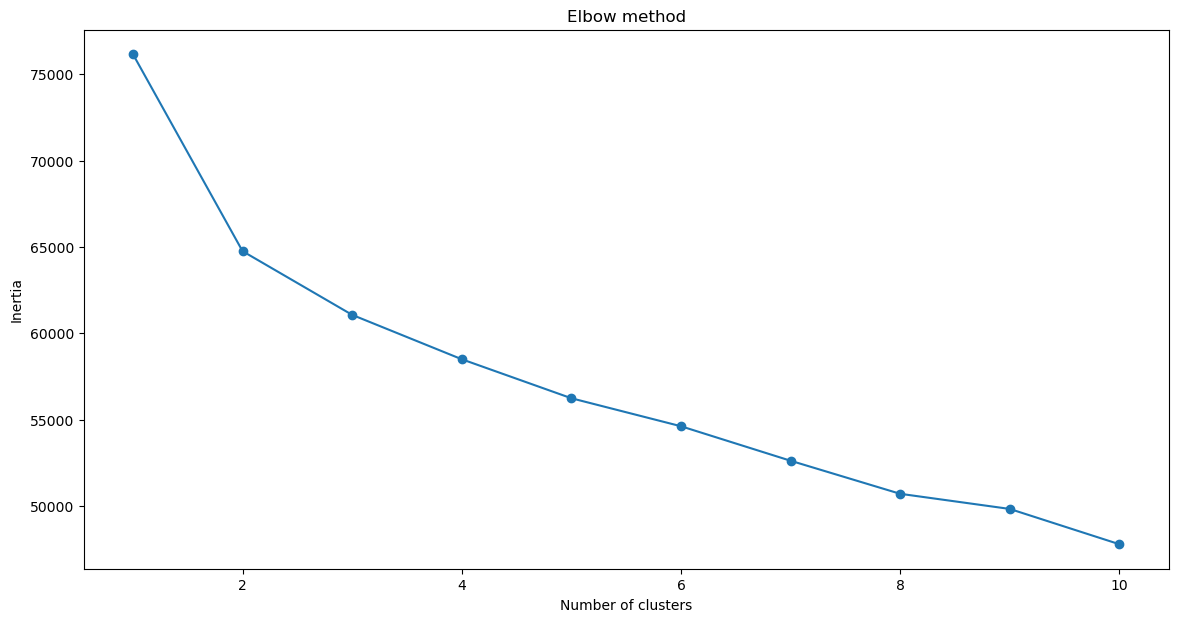

In [12]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
# visualize elbow curve
plt.figure(figsize=(14, 7))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
    

- **2** is the optimal number of clusters based on the plot

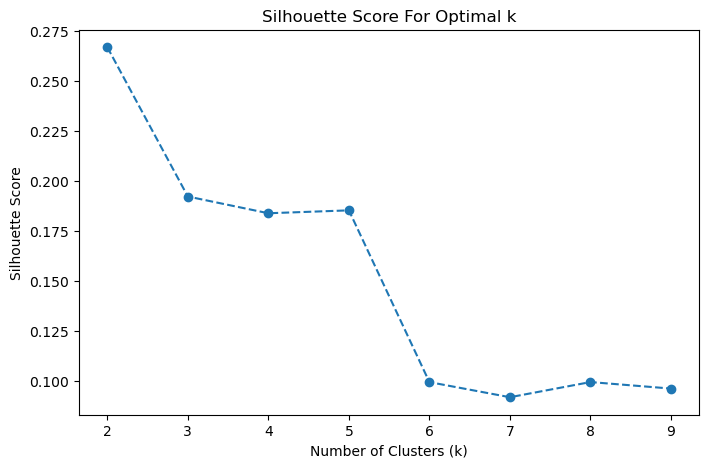

In [17]:
def find_optimal_k(df):
    silhouette_scores = []
    K = range(2, 10)  # Range of clusters to try
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores
silhouette_scores = find_optimal_k(df)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()


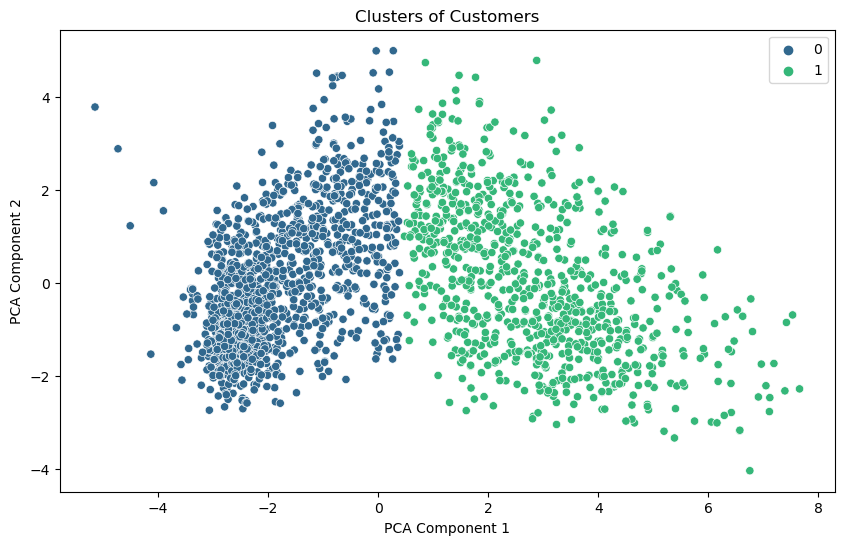


               ID  Year_Birth  Education    Income   Kidhome  Teenhome  \
Cluster                                                                  
0       -0.004104    0.093824  -0.032084 -0.518767  0.459881  0.098242   
1        0.006295   -0.143919   0.049215  0.795755 -0.705429 -0.150697   

          Recency  MntWines  MntFruits  MntMeatProducts  ...  \
Cluster                                                  ...   
0       -0.010043 -0.589622  -0.490717        -0.571494  ...   
1        0.015405  0.904443   0.752729         0.876636  ...   

         Marital_Status_Alone  Marital_Status_Divorced  \
Cluster                                                  
0                    0.023874                -0.022854   
1                   -0.036621                 0.035057   

         Marital_Status_Married  Marital_Status_Single  \
Cluster                                                  
0                      0.025712              -0.001027   
1                     -0.039441       

In [13]:
# Train the K-means model with the optimal number of clusters found which is 4
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)
# reduce dimensions using pca
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

print()
# Analyze the cluster profiles
cluster_profiles = df.groupby('Cluster').mean()
print(cluster_profiles)

## General Insights:
- The data has been clustered into two groups (`labeled 0 and 1`).
- Each cluster represents a segment of the population with unique characteristics in terms of demographic, economic, and behavioral attributes.
- **Cluster 0**:
  - **Demographics:** Lower than average income, more kids at home, fewer teenagers.
  - **Spending Behavior:** Lower expenditure on wines and fruits
  - **Campaign Response:** Lower acceptance and response rates.
  - **Customer Relationship:** Relatively new customers. 
  
- **Cluster 1**:
  - **Demographics:** Higher than average income, fewer kids at home, more teenagers.
  - **Spending Behavior:** Higher expenditure on wines and fruits
  - **Campaign Response:** Higher acceptance and response rates.
  - **Customer Relationship:** Longer relationship with the company.
   

## Implications for Marketing:
- **Cluster 0** could be targeted with affordable products to align with lower income levels, Focus on family-oriented promotions like discounts on children’s products and Increase personalized engagement efforts to improve response rates.

- **Cluster 1** could be targeted with premium products and services, particularly in wines and fruits categories, Implement loyalty programs to reinforce their longer relationship and higher engagement and Launch exclusive campaigns targeting this segment due to their higher acceptance rates.

